# Day 3 (30/12/2021) 

In [54]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Phase 1: Clean Data 

In [55]:
# import dataset
player = pd.read_csv("E:/Python/NFL 2022/players.csv")
player.head(10)

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
5,44931,6-4,221,1993-09-16,North Carolina,WR,Mack Hollins
6,44985,5-8,173,1995-04-09,Georgia,WR,Isaiah McKenzie
7,45369,6-4,210,1995-08-14,Hawaii,WR,Marcus Kemp
8,45608,5-10,180,1994-10-23,Iowa State,CB,Jamal Perry
9,46223,6-0,205,1994-08-04,Jacksonville State,CB,Siran Neal


In [56]:
#date type
player.dtypes

nflId           int64
height         object
weight          int64
birthDate      object
collegeName    object
Position       object
displayName    object
dtype: object

In [57]:
#Check Null
player.isnull().sum()

nflId           0
height          0
weight          0
birthDate      17
collegeName     8
Position        0
displayName     0
dtype: int64

In [58]:
#Drop Na
player.dropna(axis = 0, how = "any", inplace = True)

In [59]:
#Height
## replace - to .
player["height"] = player["height"].str.replace("-", ".")
player["height"].head(5)

0    6.1
1    6.0
2    6.0
3    6.1
4    6.1
Name: height, dtype: object

In [60]:
#Height
## change to float
player["height"] = player["height"].astype("float64")
player["height"].head(20)

0     6.10
1     6.00
2     6.00
3     6.10
4     6.10
5     6.40
6     5.80
7     6.40
8     5.10
9     6.00
10    5.11
11    6.00
12    5.10
13    6.40
14    5.10
15    6.60
16    6.50
17    6.00
18    5.11
19    6.50
Name: height, dtype: float64

In [61]:
#Weight
## change to kilogram

player["weight"] = player["weight"] * 0.45
player["weight"].head(10)

0     93.60
1     99.00
2     92.25
3    105.75
4    106.20
5     99.45
6     77.85
7     94.50
8     81.00
9     92.25
Name: weight, dtype: float64

In [62]:
#BirthDate
## Change to dd/mm/yyyy

player["birthDate"] = pd.to_datetime(player["birthDate"])
player["birthDate"].head(10)

0   1992-07-25
1   1994-08-11
2   1993-06-02
3   1992-12-22
4   1993-02-22
5   1993-09-16
6   1995-04-09
7   1995-08-14
8   1994-10-23
9   1994-08-04
Name: birthDate, dtype: datetime64[ns]

In [63]:
#change order datetime to dd/mm/yyyy

player["birthDate"] = player["birthDate"].dt.strftime("%d/%m/%Y")

# Phase 2: Analyze Data 

In [73]:
#weight by position (sum)

weight_position_sum = pd.pivot_table(data = player, values = ["weight"], index = "Position", aggfunc = "sum")
weight_position_sum.sort_values(by = "weight", ascending = False)

,weight
Position,
WR,29258.55
T,26690.40
CB,26263.35
DE,25081.65
G,24272.10
DT,22638.15
OLB,21702.15
TE,21546.45
RB,17134.65


In [81]:
#weight by position (avg)

weight_position_mean = pd.pivot_table(data = player, index = ["Position"], values = ["weight"], aggfunc = "mean")
weight_position_mean.sort_values(by = "weight", ascending = False)

,weight
Position,
NT,143.859375
OT,142.050000
T,141.970213
G,141.942105
OG,137.925000
C,137.881034
DT,137.200909
DE,122.349512
TE,113.402368


# Phase 3: Visualization 

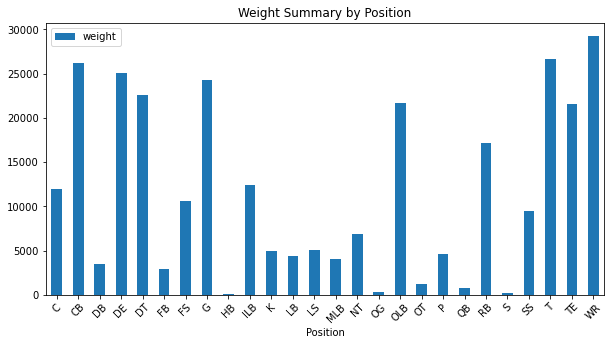

In [91]:
# Weight Summary by Position

weight_position_sum_bar = weight_position_sum.plot(kind = "bar", title = "Weight Summary by Position", figsize = (10,5))
plt.xticks(rotation = 45)
plt.show()

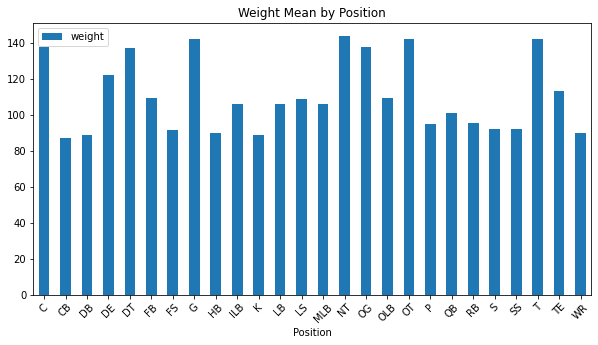

In [90]:
# Weight Mean by Position

weight_position_mean_bar = weight_position_mean.plot(kind = "bar", title = "Weight Mean by Position", figsize = (10,5))
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#That is the end of analysis